In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from lifetimes import BetaGeoFitter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
Tranx_df = pd.read_csv("Online_Retail.csv",encoding='ISO-8859-1')

In [3]:
Tranx_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [4]:
Tranx_df.duplicated().sum()

5268

In [5]:
Tranx_df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [6]:
missing_values = Tranx_df.isnull().sum()

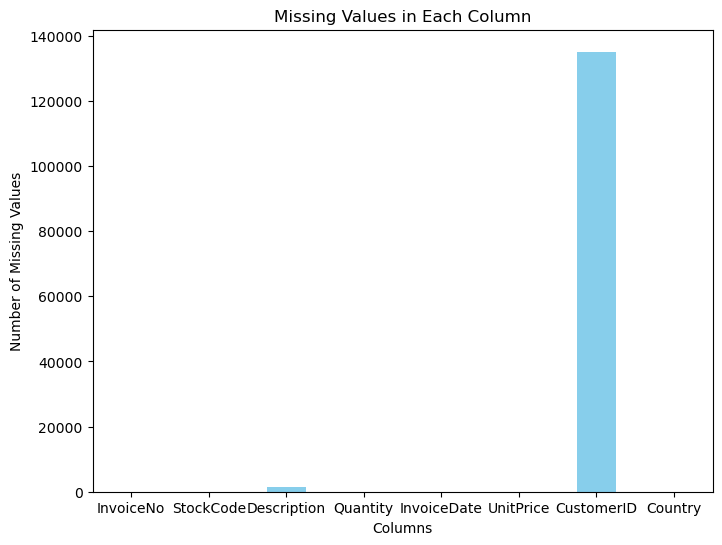

In [7]:
plt.figure(figsize=(8, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=0)
plt.show()

In [8]:
Tranx_df.dropna(subset=['CustomerID'], inplace=True)

In [9]:
Tranx_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
Tranx_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


### Dataframe Details 

In [11]:
Tranx_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


#### convert Invoice Date columnn to Date 

In [12]:
Tranx_df['InvoiceDate'] = pd.to_datetime(Tranx_df['InvoiceDate'])

In [13]:
Tranx_df_max =  Tranx_df['InvoiceDate'].max()

In [14]:
Tranx_df_min =  Tranx_df['InvoiceDate'].min()

#### Determine a cutoff date for 90 days 

In [15]:
Tranx_df_min

Timestamp('2010-12-01 08:26:00')

In [16]:
Tranx_df_max

Timestamp('2011-12-09 12:50:00')

In [17]:
n_days= 90 

cut_off = Tranx_df_max - pd.to_timedelta(n_days, unit='days')

In [18]:
print(cut_off)

2011-09-10 12:50:00


In [19]:
(cut_off - Tranx_df_min).days

283

In [20]:
temporal_in = Tranx_df[Tranx_df['InvoiceDate'] <= cut_off]
temporal_out = Tranx_df[Tranx_df['InvoiceDate'] > cut_off]

In [21]:
temporal_in

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
333860,566220,22989,SET 2 PANTRY DESIGN TEA TOWELS,24,2011-09-09 15:53:00,3.25,15251.0,United Kingdom
333861,566220,22980,PANTRY SCRUBBING BRUSH,48,2011-09-09 15:53:00,1.45,15251.0,United Kingdom
333862,566220,22622,BOX OF VINTAGE ALPHABET BLOCKS,6,2011-09-09 15:53:00,11.95,15251.0,United Kingdom
334050,C566222,23118,PARISIENNE JEWELLERY DRAWER,-1,2011-09-09 16:34:00,7.50,13458.0,United Kingdom


In [22]:
Input_df = temporal_in.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (cut_off - x.max()).days, 
    'InvoiceNo': 'count',  
    'UnitPrice': 'sum'  
}).rename(columns={
    'InvoiceDate': 'recency',
    'InvoiceNo': 'frequency',
    'UnitPrice': 'Monetary'
}).assign(T=lambda x: (cut_off - temporal_in.groupby('CustomerID')['InvoiceDate'].min()).dt.days)


In [23]:
Input_df

,recency,frequency,Monetary,T
CustomerID,,,,
12346.0,235,2,2.08,235
12347.0,39,124,346.91,276
12348.0,158,28,136.21,267
12350.0,219,17,65.30,219
12352.0,171,48,1900.07,206
...,...,...,...,...
18280.0,187,10,47.65,187
18281.0,90,7,39.36,90
18282.0,31,8,39.16,35


In [24]:
Input_df['AVG_PURCHASE'] = Input_df['Monetary']/Input_df['frequency']

In [25]:
clv_df = temporal_out.groupby('CustomerID').agg({
    'UnitPrice': 'sum'
}).rename(columns={'UnitPrice': 'CLV'})

print("CLV:\n", clv_df.head())

CLV:
                CLV
CustomerID        
12347.0     134.30
12348.0      42.50
12349.0     605.10
12352.0     311.03
12356.0      23.70


In [26]:
clv_df

,CLV
CustomerID,
12347.0,134.30
12348.0,42.50
12349.0,605.10
12352.0,311.03
12356.0,23.70
...,...
18277.0,25.13
18278.0,29.55
18282.0,23.52


In [27]:
final_df = Input_df.merge(clv_df, on='CustomerID', how='left').fillna(0)

In [28]:
final_df

,recency,frequency,Monetary,T,AVG_PURCHASE,CLV
CustomerID,,,,,,
12346.0,235,2,2.08,235,1.040000,0.00
12347.0,39,124,346.91,276,2.797661,134.30
12348.0,158,28,136.21,267,4.864643,42.50
12350.0,219,17,65.30,219,3.841176,0.00
12352.0,171,48,1900.07,206,39.584792,311.03
...,...,...,...,...,...,...
18280.0,187,10,47.65,187,4.765000,0.00
18281.0,90,7,39.36,90,5.622857,0.00
18282.0,31,8,39.16,35,4.895000,23.52


In [29]:
final_df.columns.tolist()

['recency', 'frequency', 'Monetary', 'T', 'AVG_PURCHASE', 'CLV']

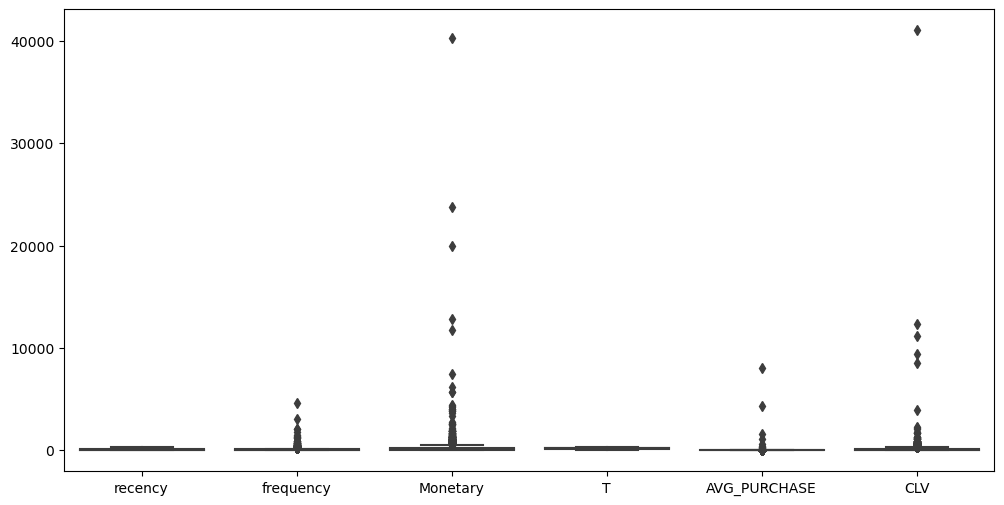

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_df)
plt.show()

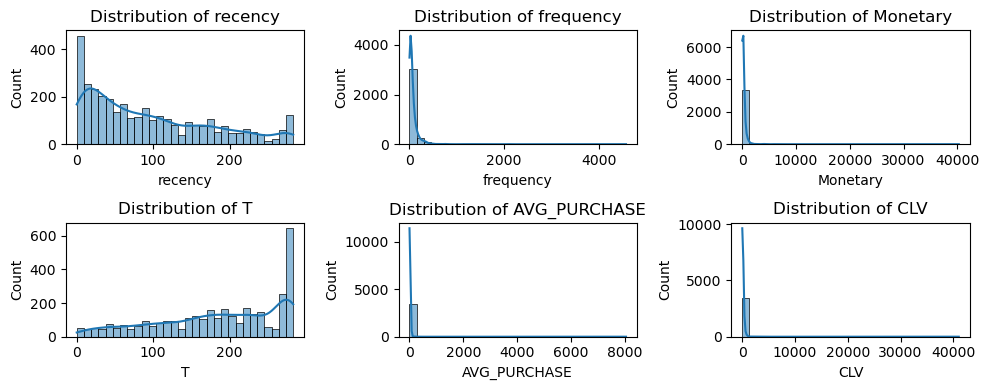

In [31]:
features = ['recency', 'frequency', 'Monetary', 'T', 'AVG_PURCHASE', 'CLV']

plt.figure(figsize=(10,4))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(final_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3412 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recency       3412 non-null   int64  
 1   frequency     3412 non-null   int64  
 2   Monetary      3412 non-null   float64
 3   T             3412 non-null   int64  
 4   AVG_PURCHASE  3412 non-null   float64
 5   CLV           3412 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 186.6 KB


In [33]:
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where(column < lower_bound, lower_bound,
                    np.where(column > upper_bound, upper_bound, column))

In [34]:
final_df = final_df.apply(cap_outliers, axis=0)

In [35]:
final_df

,recency,frequency,Monetary,T,AVG_PURCHASE,CLV
CustomerID,,,,,,
12346.0,235.0,2.000,2.08000,235.0,1.040000,0.00000
12347.0,39.0,124.000,346.91000,276.0,2.797661,134.30000
12348.0,158.0,28.000,136.21000,267.0,4.864643,42.50000
12350.0,219.0,17.000,65.30000,219.0,3.841176,0.00000
12352.0,171.0,48.000,541.23125,206.0,6.837877,293.35625
...,...,...,...,...,...,...
18280.0,187.0,10.000,47.65000,187.0,4.765000,0.00000
18281.0,90.0,7.000,39.36000,90.0,5.622857,0.00000
18282.0,31.0,8.000,39.16000,35.0,4.895000,23.52000


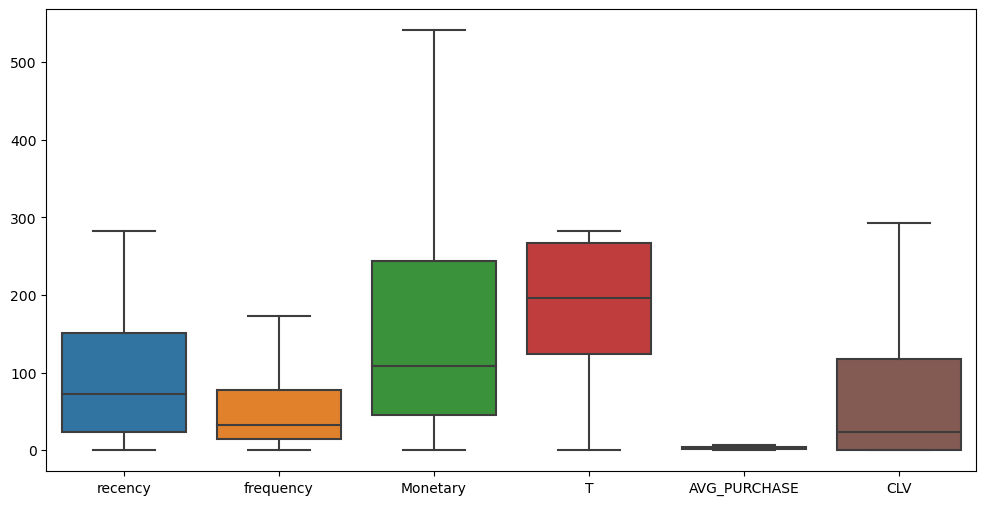

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_df)
plt.show()

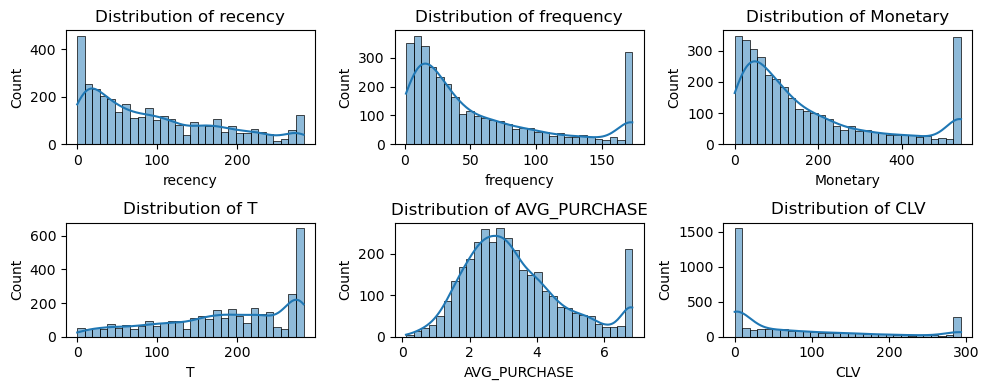

In [37]:
features = ['recency', 'frequency', 'Monetary', 'T', 'AVG_PURCHASE', 'CLV']

plt.figure(figsize=(10,4))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(final_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

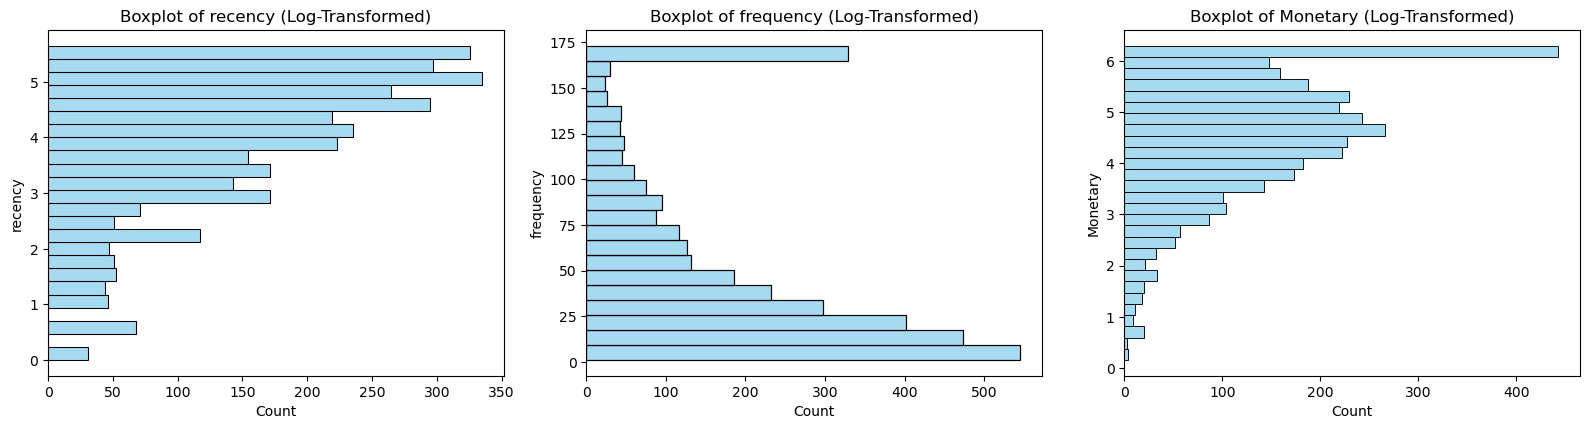

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

features = ['recency', 'frequency', 'Monetary']
df_log_transformed = final_df.copy()
df_log_transformed['Monetary'] = np.log1p(df_log_transformed['Monetary'])
df_log_transformed['recency'] = np.log1p(df_log_transformed['recency'])
df_log_transformed['T'] = np.log1p(df_log_transformed['T'])
df_log_transformed['AVG_PURCHASE'] = np.log1p(df_log_transformed['AVG_PURCHASE'])

plt.figure(figsize=(16, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(y=df_log_transformed[feature], color='skyblue')
    plt.title(f'Boxplot of {feature} (Log-Transformed)' if feature in df_log_transformed.columns else f'Boxplot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [39]:
corr= final_df.corr()

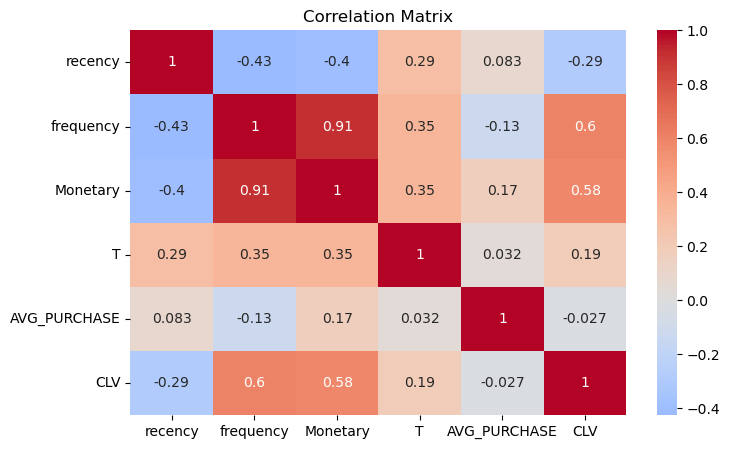

In [40]:
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [41]:
Y = final_df['CLV']

In [42]:
X = final_df.drop(columns =['CLV'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [44]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [45]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [46]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}")
    

print("Random Forest:")
evaluate_model(rf_model, X_test, y_test)


print("Linear Regression:")
evaluate_model(lr_model, X_test, y_test)


print("\nGradient Boosting:")
evaluate_model(gb_model, X_test, y_test)

Random Forest:
RMSE: 77.64, MAE: 57.10, R-squared: 0.36
Linear Regression:
RMSE: 74.48, MAE: 55.54, R-squared: 0.42

Gradient Boosting:
RMSE: 73.41, MAE: 53.99, R-squared: 0.43


In [47]:
y_pred_gb =gb_model.predict(X_test)

In [48]:
y_pred_lr = lr_model.predict(X_test)

In [49]:
y_pred_rf = rf_model.predict(X_test)

In [50]:
y_gb = gb_model.predict(X)

In [51]:
final_df['predict'] = y_gb

In [52]:
final_df

,recency,frequency,Monetary,T,AVG_PURCHASE,CLV,predict
CustomerID,,,,,,,
12346.0,235.0,2.000,2.08000,235.0,1.040000,0.00000,8.318759
12347.0,39.0,124.000,346.91000,276.0,2.797661,134.30000,148.116346
12348.0,158.0,28.000,136.21000,267.0,4.864643,42.50000,35.717984
12350.0,219.0,17.000,65.30000,219.0,3.841176,0.00000,27.194378
12352.0,171.0,48.000,541.23125,206.0,6.837877,293.35625,78.299513
...,...,...,...,...,...,...,...
18280.0,187.0,10.000,47.65000,187.0,4.765000,0.00000,11.776338
18281.0,90.0,7.000,39.36000,90.0,5.622857,0.00000,13.138916
18282.0,31.0,8.000,39.16000,35.0,4.895000,23.52000,29.653210


In [53]:
final_df

,recency,frequency,Monetary,T,AVG_PURCHASE,CLV,predict
CustomerID,,,,,,,
12346.0,235.0,2.000,2.08000,235.0,1.040000,0.00000,8.318759
12347.0,39.0,124.000,346.91000,276.0,2.797661,134.30000,148.116346
12348.0,158.0,28.000,136.21000,267.0,4.864643,42.50000,35.717984
12350.0,219.0,17.000,65.30000,219.0,3.841176,0.00000,27.194378
12352.0,171.0,48.000,541.23125,206.0,6.837877,293.35625,78.299513
...,...,...,...,...,...,...,...
18280.0,187.0,10.000,47.65000,187.0,4.765000,0.00000,11.776338
18281.0,90.0,7.000,39.36000,90.0,5.622857,0.00000,13.138916
18282.0,31.0,8.000,39.16000,35.0,4.895000,23.52000,29.653210


In [54]:


gb_model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")
best_gb_model = grid_search.best_estimator_


Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = best_gb_model.predict(X_test)


rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}")


RMSE: 72.58, MAE: 53.68, R-squared: 0.44


In [56]:


snapshot_date = Tranx_df['InvoiceDate'].max() + pd.Timedelta(days=1)
customer_metrics_train =Tranx_df.groupby('CustomerID').agg(
     recency=('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
    frequency=('InvoiceDate', 'count'),
     monetary=('UnitPrice', 'mean'),
           T=('InvoiceDate', lambda x: (snapshot_date - x.min()).days)
).reset_index()
  

snapshot_date_holdout = Tranx_df['InvoiceDate'].max() + pd.Timedelta(days=1)
customer_metrics_holdout = Tranx_df.groupby('CustomerID').agg(
    actual_clv=('UnitPrice', 'sum')
).reset_index()

bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(customer_metrics_train['frequency'], customer_metrics_train['recency'], customer_metrics_train['T'])

prediction_horizon = 90
customer_metrics_train['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    prediction_horizon, customer_metrics_train['frequency'], customer_metrics_train['recency'], customer_metrics_train['T']
)
customer_metrics_train['predicted_clv_pareto'] = customer_metrics_train['predicted_purchases'] * customer_metrics_train['monetary']


results = pd.merge(customer_metrics_train[['CustomerID', 'predicted_clv_pareto']],
                   customer_metrics_holdout[['CustomerID', 'actual_clv']],
                   on='CustomerID', how='left').fillna(0)

mse = mean_squared_error(results['actual_clv'], results['predicted_clv_pareto'])
rmse = np.sqrt(mse)
r_squared = r2_score(results['actual_clv'], results['predicted_clv_pareto'])

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")



MSE: 1465569.9835669533
RMSE: 1210.6072788344507
R-squared: 0.11193188159746081


In [57]:
compare = pd.merge(results,final_df ,on = ['CustomerID'] ).drop(columns=['actual_clv','recency','frequency','AVG_PURCHASE'])

In [58]:
compare

,CustomerID,predicted_clv_pareto,Monetary,T,CLV,predict
0,12346.0,6.346994e-01,2.08000,235.0,0.00000,8.318759
1,12347.0,0.000000e+00,346.91000,276.0,134.30000,148.116346
2,12348.0,3.466665e-18,136.21000,267.0,42.50000,35.717984
3,12350.0,1.867011e+01,65.30000,219.0,0.00000,27.194378
4,12352.0,4.472976e-83,541.23125,206.0,293.35625,78.299513
...,...,...,...,...,...,...
3407,18280.0,1.543588e+01,47.65000,187.0,0.00000,11.776338
3408,18281.0,1.973934e+01,39.36000,90.0,0.00000,13.138916
3409,18282.0,7.782172e-13,39.16000,35.0,23.52000,29.653210
3410,18283.0,0.000000e+00,541.23125,246.0,293.35625,183.787992


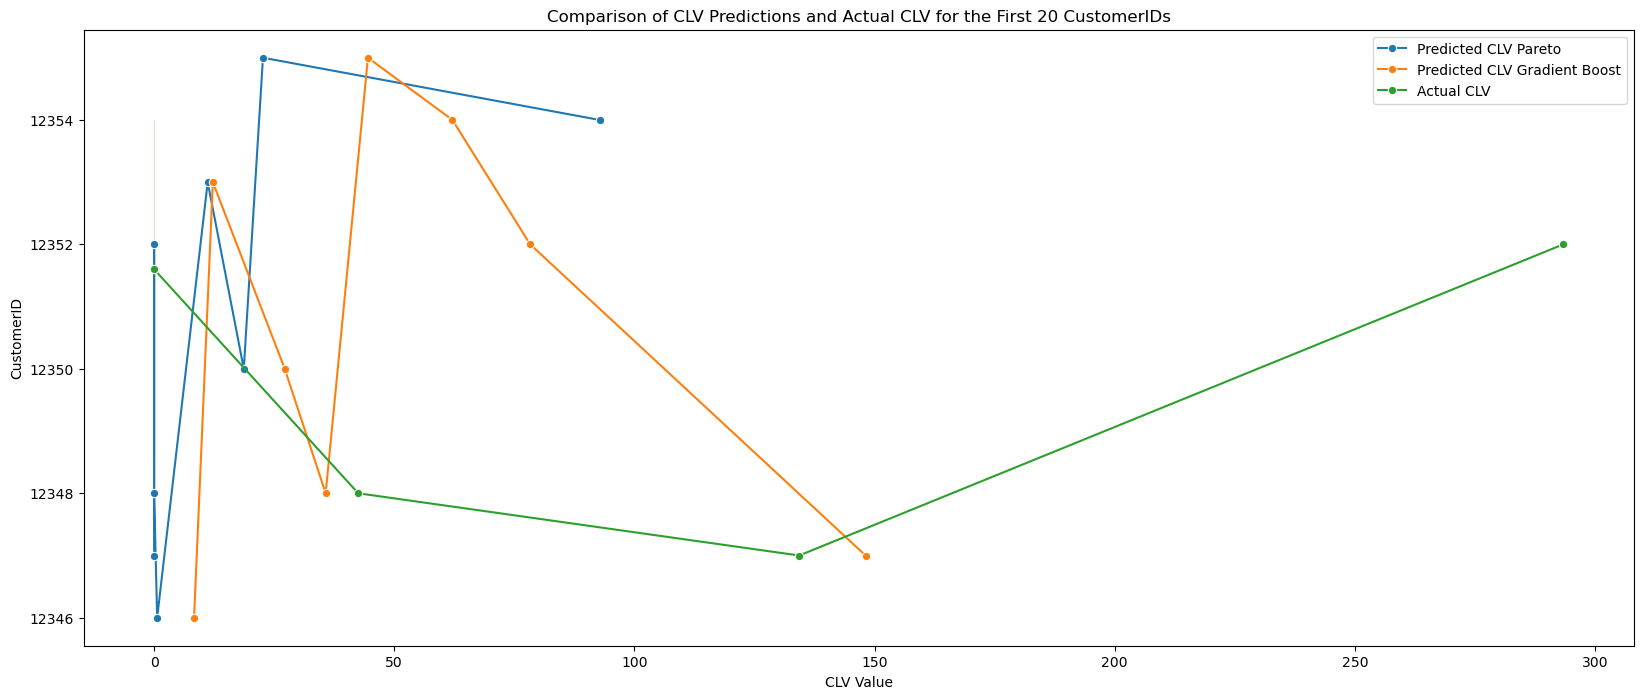

In [59]:
compare_subset = compare.head(8)

plt.figure(figsize=(20, 8))

sns.lineplot(data=compare_subset, x="predicted_clv_pareto", y="CustomerID", label='Predicted CLV Pareto', marker='o')

sns.lineplot(data=compare_subset, x="predict", y="CustomerID", label='Predicted CLV Gradient Boost', marker='o')

sns.lineplot(data=compare_subset, x="CLV", y="CustomerID", label='Actual CLV', marker='o')

plt.title('Comparison of CLV Predictions and Actual CLV for the First 20 CustomerIDs')
plt.xlabel('CLV Value')
plt.ylabel('CustomerID')
plt.legend()

In [60]:
y_test_df = pd.DataFrame({'y_pred_gb': y_pred_gb,
                           'y_pred_lr': y_pred_lr,
                           'y_pred_rf': y_pred_rf})

In [61]:
y_test_df["customerID"] = compare['CustomerID']

In [62]:
y_test_df["CLV"] = compare['CLV']

In [63]:
y_test_df

,y_pred_gb,y_pred_lr,y_pred_rf,customerID,CLV
0,146.807710,155.463550,123.169750,12346.0,0.00000
1,178.852949,190.427808,190.997375,12347.0,134.30000
2,54.798363,47.033385,78.977088,12348.0,42.50000
3,129.107167,76.732061,105.519300,12350.0,0.00000
4,17.776940,20.971055,6.687700,12352.0,293.35625
...,...,...,...,...,...
678,45.845372,36.084265,49.222163,13489.0,0.00000
679,40.669138,42.785212,43.413610,13491.0,25.44000
680,164.315495,194.185727,161.656750,13492.0,0.00000
681,194.868562,196.509538,196.165275,13493.0,0.00000


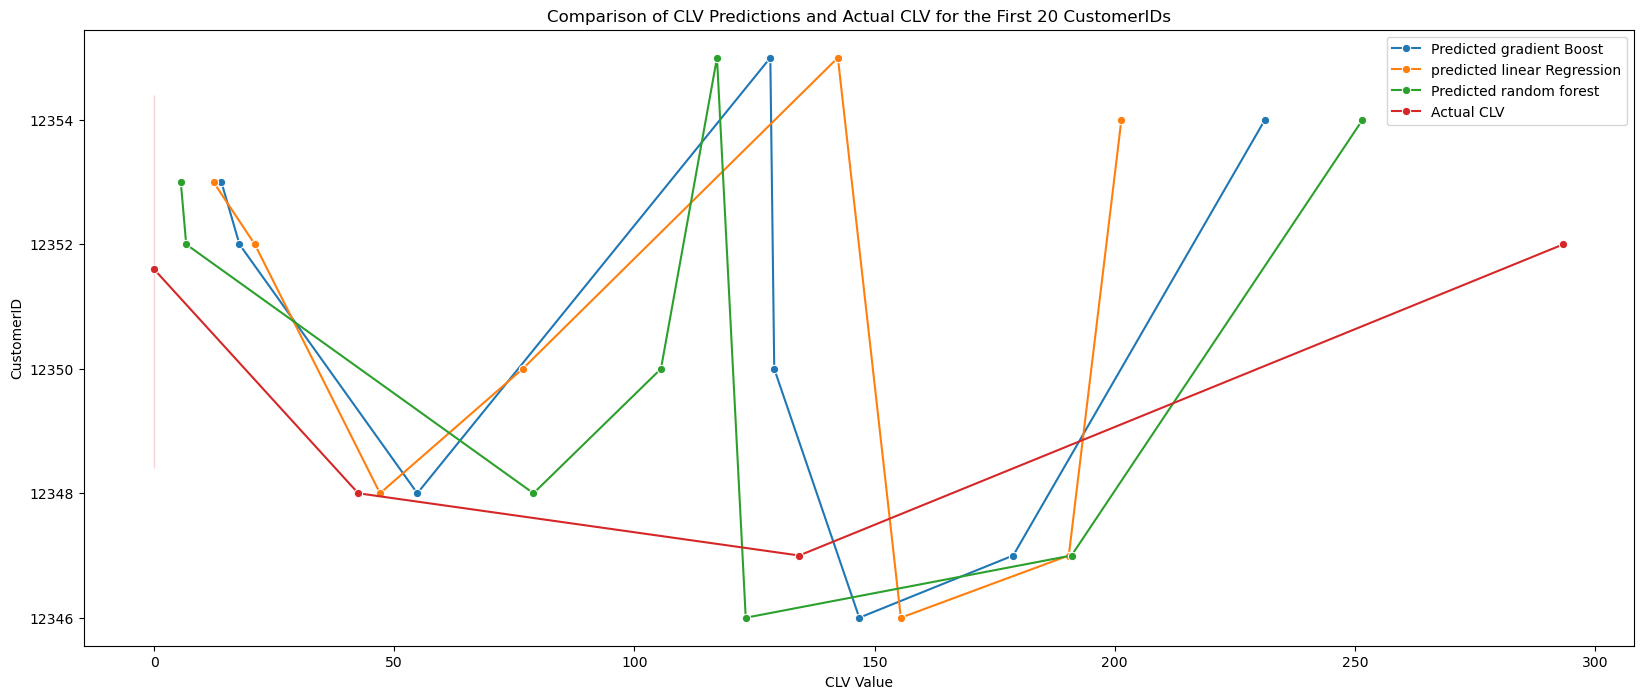

In [64]:
y_test_df_ = y_test_df.head(8)

plt.figure(figsize=(20, 8))

sns.lineplot(data= y_test_df_, x="y_pred_gb", y="customerID", label='Predicted gradient Boost', marker='o')

sns.lineplot(data= y_test_df_,x="y_pred_lr", y="customerID", label='predicted linear Regression', marker='o')

sns.lineplot(data= y_test_df_, x="y_pred_rf", y="customerID", label='Predicted random forest', marker='o')

sns.lineplot(data= y_test_df_, x="CLV", y="customerID", label='Actual CLV ', marker='o')

plt.title('Comparison of CLV Predictions and Actual CLV for the First 20 CustomerIDs')
plt.xlabel('CLV Value')
plt.ylabel('CustomerID')
plt.legend()

In [65]:
final_df

,recency,frequency,Monetary,T,AVG_PURCHASE,CLV,predict
CustomerID,,,,,,,
12346.0,235.0,2.000,2.08000,235.0,1.040000,0.00000,8.318759
12347.0,39.0,124.000,346.91000,276.0,2.797661,134.30000,148.116346
12348.0,158.0,28.000,136.21000,267.0,4.864643,42.50000,35.717984
12350.0,219.0,17.000,65.30000,219.0,3.841176,0.00000,27.194378
12352.0,171.0,48.000,541.23125,206.0,6.837877,293.35625,78.299513
...,...,...,...,...,...,...,...
18280.0,187.0,10.000,47.65000,187.0,4.765000,0.00000,11.776338
18281.0,90.0,7.000,39.36000,90.0,5.622857,0.00000,13.138916
18282.0,31.0,8.000,39.16000,35.0,4.895000,23.52000,29.653210


In [66]:
final_df= final_df.drop(columns=['predict'])

 ###  Segment Dataset 

In [67]:
scaler = StandardScaler()
final_df_sc = scaler.fit_transform(final_df)

###  determine the number of components 

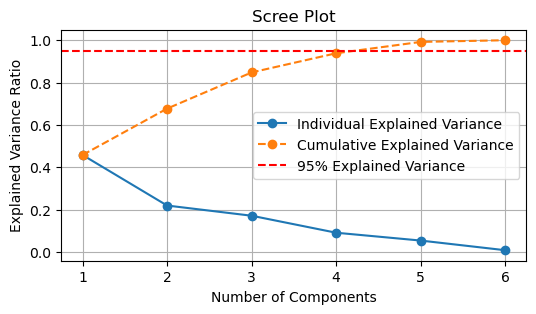

In [68]:
pca = PCA()
pca.fit(final_df_sc)

explained_variance = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance)


plt.figure(figsize=(6,3))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
pca = PCA(n_components= 4)
PC_final_df = pca.fit_transform(final_df_sc)

In [70]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(PC_final_df)
    wcss.append(kmeans.inertia_)

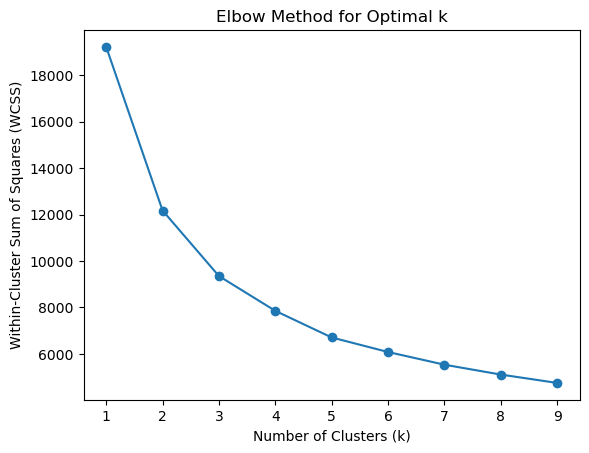

In [71]:
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [72]:
kmeans =   KMeans(n_clusters=3, init="random",random_state=0)

Y_kmeans = kmeans.fit_predict(PC_final_df)

In [73]:
Y_kmeans

array([1, 0, 1, ..., 2, 0, 2])

In [74]:
sum(pca.explained_variance_ratio_)

0.9384462294361506

In [75]:
final_df["cluster"] = Y_kmeans

In [76]:
final_df

,recency,frequency,Monetary,T,AVG_PURCHASE,CLV,cluster
CustomerID,,,,,,,
12346.0,235.0,2.000,2.08000,235.0,1.040000,0.00000,1
12347.0,39.0,124.000,346.91000,276.0,2.797661,134.30000,0
12348.0,158.0,28.000,136.21000,267.0,4.864643,42.50000,1
12350.0,219.0,17.000,65.30000,219.0,3.841176,0.00000,1
12352.0,171.0,48.000,541.23125,206.0,6.837877,293.35625,0
...,...,...,...,...,...,...,...
18280.0,187.0,10.000,47.65000,187.0,4.765000,0.00000,1
18281.0,90.0,7.000,39.36000,90.0,5.622857,0.00000,2
18282.0,31.0,8.000,39.16000,35.0,4.895000,23.52000,2


In [77]:
baseline_labels = kmeans.labels_

def permutation_importance_kmeans(model, X, baseline_labels, n_repeats=30, random_state=0):
    rng = np.random.RandomState(random_state)
    importance_scores = np.zeros(X.shape[1])
    
    for col in range(X.shape[1]):
        scores = []
        for _ in range(n_repeats):
            X_permuted = X.copy()
            rng.shuffle(X_permuted[:, col])
            model.fit(X_permuted)
            permuted_labels = model.labels_
            score = adjusted_rand_score(baseline_labels, permuted_labels)
            scores.append(score)
        importance_scores[col] = np.mean(scores)
    
    return 1 - importance_scores  

perm_importance = permutation_importance_kmeans(kmeans,PC_final_df, baseline_labels)

feature_importance_df = pd.DataFrame({
    'Feature': ['PC1', 'PC2','PC3','PC4'],
    'Importance': perm_importance
})

print("\nFeature importance based on permutation importance:")
print(feature_importance_df)


Feature importance based on permutation importance:
  Feature  Importance
0     PC1    0.719548
1     PC2    0.681496
2     PC3    0.061888
3     PC4    0.027745


In [78]:
pca_components = pd.DataFrame(pca.components_, columns=final_df.drop(columns=['cluster']).columns, index=['PC1','PC2','PC3','PC4'])
print("\nContribution of original features to each principal component:")
print(pca_components)


Contribution of original features to each principal component:
      recency  frequency  Monetary         T  AVG_PURCHASE       CLV
PC1 -0.307769   0.570936  0.563144  0.225407     -0.007190  0.459695
PC2  0.640426   0.002805  0.084189  0.707588      0.285769 -0.020338
PC3 -0.161764  -0.122076  0.171329 -0.250192      0.930656 -0.029334
PC4  0.321932  -0.212175 -0.211493 -0.251363      0.026650  0.861811


In [79]:

pca_df = pd.DataFrame(PC_final_df, columns=['PC1', 'PC2','PC3','PC4'])
pca_df['cluster'] = kmeans.labels_
cluster_summary = pca_df.groupby('cluster').mean()
print("\nMean values of each principal component in each cluster:")
print(cluster_summary)


Mean values of each principal component in each cluster:
              PC1       PC2       PC3       PC4
cluster                                        
0       -0.689771 -1.033953  0.093947 -0.024608
1        2.418655  0.125457 -0.011430 -0.049431
2       -1.021539  1.054335 -0.095777  0.063815


In [80]:

for pc in ['PC1', 'PC2','PC3','PC4']:
    print(f"\n{pc} is dominated by:")
    sorted_features = pca_components.loc[pc].abs().sort_values(ascending=False)
    print(sorted_features)


PC1 is dominated by:
frequency       0.570936
Monetary        0.563144
CLV             0.459695
recency         0.307769
T               0.225407
AVG_PURCHASE    0.007190
Name: PC1, dtype: float64

PC2 is dominated by:
T               0.707588
recency         0.640426
AVG_PURCHASE    0.285769
Monetary        0.084189
CLV             0.020338
frequency       0.002805
Name: PC2, dtype: float64

PC3 is dominated by:
AVG_PURCHASE    0.930656
T               0.250192
Monetary        0.171329
recency         0.161764
frequency       0.122076
CLV             0.029334
Name: PC3, dtype: float64

PC4 is dominated by:
CLV             0.861811
recency         0.321932
T               0.251363
frequency       0.212175
Monetary        0.211493
AVG_PURCHASE    0.026650
Name: PC4, dtype: float64


#### ------------------------- FIRST CLUSTER ----------------------------------------------

In [81]:
final_cluster_0 = final_df[final_df['cluster']==0]

In [82]:
YC = final_cluster_0['CLV']

In [83]:
YC

CustomerID
12347.0    134.30000
12352.0    293.35625
12359.0    293.35625
12360.0    187.15000
12362.0    293.35625
             ...    
18245.0    195.16000
18257.0    129.23000
18260.0      0.00000
18272.0    136.23000
18283.0    293.35625
Name: CLV, Length: 881, dtype: float64

In [84]:
XC = final_cluster_0.drop(columns=['CLV','cluster'])

In [85]:
XC

,recency,frequency,Monetary,T,AVG_PURCHASE
CustomerID,,,,,
12347.0,39.0,124.000,346.91000,276.0,2.797661
12352.0,171.0,48.000,541.23125,206.0,6.837877
12359.0,99.0,145.000,541.23125,241.0,6.837877
12360.0,22.0,75.000,270.76000,110.0,3.610133
12362.0,22.0,110.000,324.90000,205.0,2.953636
...,...,...,...,...,...
18245.0,58.0,122.000,274.11000,264.0,2.246803
18257.0,23.0,85.000,291.85000,205.0,3.433529
18260.0,82.0,140.000,515.59000,267.0,3.682786


In [86]:
XC_train, XC_test, yC_train, yC_test = train_test_split(XC, YC, test_size=0.2, random_state=42)

In [87]:
lr_model = LinearRegression()
lr_model.fit(XC_train, yC_train)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(XC_train, yC_train)


gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(XC_train, yC_train)

GradientBoostingRegressor(random_state=42)

In [88]:
def evaluate_model(model, XC_test, yC_test):
    yC_pred = model.predict(XC_test)
    rmse = mean_squared_error(yC_test, yC_pred, squared=False)
    mae = mean_absolute_error(yC_test, yC_pred)
    r2 = r2_score(yC_test, yC_pred)
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}")
    


print("\nGradient Boosting:")
evaluate_model(gb_model, XC_test, yC_test)


Gradient Boosting:
RMSE: 92.32, MAE: 76.72, R-squared: 0.14


In [89]:
print("Random Forest:")
evaluate_model(rf_model, XC_test, yC_test)


print("Linear Regression:")
evaluate_model(lr_model, XC_test, yC_test)

Random Forest:
RMSE: 93.46, MAE: 76.41, R-squared: 0.11
Linear Regression:
RMSE: 97.83, MAE: 83.27, R-squared: 0.03


In [90]:
y_test_df = pd.DataFrame({'y_pred_gb': y_pred_gb,
                           'y_pred_lr': y_pred_lr,
                           'y_pred_rf': y_pred_rf})

In [91]:
y_test_df = pd.DataFrame({'y_pred_gb': y_pred_gb,
                           'y_pred_lr': y_pred_lr,
                           'y_pred_rf': y_pred_rf})

###### -------------------CLUSTER  2--------------------------------

In [92]:
final_cluster_1 = final_df[final_df['cluster']==1]

In [93]:
final_cluster_1

,recency,frequency,Monetary,T,AVG_PURCHASE,CLV,cluster
CustomerID,,,,,,,
12346.0,235.0,2.0,2.08,235.0,1.040000,0.00,1
12348.0,158.0,28.0,136.21,267.0,4.864643,42.50,1
12350.0,219.0,17.0,65.30,219.0,3.841176,0.00,1
12354.0,141.0,58.0,261.22,141.0,4.503793,0.00,1
12356.0,155.0,57.0,165.17,235.0,2.897719,23.70,1
...,...,...,...,...,...,...,...
18259.0,275.0,7.0,22.10,275.0,3.157143,114.80,1
18269.0,267.0,8.0,27.10,275.0,3.387500,0.00,1
18270.0,150.0,7.0,39.85,176.0,5.692857,19.25,1


In [94]:
x_1 = final_cluster_1.drop(columns=['CLV','cluster'])

In [95]:
x_1

,recency,frequency,Monetary,T,AVG_PURCHASE
CustomerID,,,,,
12346.0,235.0,2.0,2.08,235.0,1.040000
12348.0,158.0,28.0,136.21,267.0,4.864643
12350.0,219.0,17.0,65.30,219.0,3.841176
12354.0,141.0,58.0,261.22,141.0,4.503793
12356.0,155.0,57.0,165.17,235.0,2.897719
...,...,...,...,...,...
18259.0,275.0,7.0,22.10,275.0,3.157143
18269.0,267.0,8.0,27.10,275.0,3.387500
18270.0,150.0,7.0,39.85,176.0,5.692857


In [96]:
y_1 = final_cluster_1['CLV']

In [97]:
xc_1train, xc_1test, yc_1train, yc_1test = train_test_split(x_1, y_1, test_size=0.2, random_state=42)

In [98]:
lr_model = LinearRegression()
lr_model.fit(xc_1train, yc_1train)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(xc_1train, yc_1train)


gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(xc_1train, yc_1train)

GradientBoostingRegressor(random_state=42)

In [99]:
def evaluate_model(model, xc_1test, yc_1test):
    y_1pred = model.predict(xc_1test)
    rmse = mean_squared_error(yc_1test, y_1pred, squared=False)
    mae = mean_absolute_error(yc_1test, y_1pred)
    r2 = r2_score(yc_1test, y_1pred)
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}")
    


print("\nGradient Boosting:")
evaluate_model(gb_model, xc_1test, yc_1test)


Gradient Boosting:
RMSE: 57.24, MAE: 40.32, R-squared: -0.12


In [100]:
print("Random Forest:")
evaluate_model(rf_model, xc_1test, yc_1test)


print("Linear Regression:")
evaluate_model(lr_model, xc_1test, yc_1test)

Random Forest:
RMSE: 58.55, MAE: 42.53, R-squared: -0.18
Linear Regression:
RMSE: 55.03, MAE: 40.03, R-squared: -0.04


#### -------------HYPER PARAMETER TUNNNING ------------

In [101]:
gb_model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [102]:

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(xc_1train, yc_1train)


print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}


In [103]:

best_gb_model = grid_search.best_estimator_
evaluate_model(best_gb_model, xc_1test, yc_1test)

RMSE: 54.31, MAE: 39.31, R-squared: -0.01


#####  ---------- Cluster 3----------------------------------------------

In [104]:
final_cluster_2 = final_df[final_df['cluster']==2]

In [105]:
final_cluster_2

,recency,frequency,Monetary,T,AVG_PURCHASE,CLV,cluster
CustomerID,,,,,,,
12353.0,113.0,4.0,24.30,113.0,6.075000,0.00,2
12355.0,123.0,13.0,54.65,123.0,4.203846,0.00,2
12358.0,60.0,12.0,92.63,60.0,6.837877,64.58,2
12363.0,19.0,23.0,53.17,151.0,2.311739,0.00,2
12364.0,21.0,34.0,69.42,21.0,2.041765,92.95,2
...,...,...,...,...,...,...,...
18268.0,43.0,2.0,25.50,44.0,6.837877,0.00,2
18273.0,5.0,2.0,5.10,167.0,2.550000,2.55,2
18281.0,90.0,7.0,39.36,90.0,5.622857,0.00,2


In [106]:
y_2 = final_cluster_2['CLV']

In [107]:
x_2 = final_cluster_2.drop(columns=['CLV','cluster'])

In [108]:
xc_2train, xc_2test, yc_2train, yc_2test = train_test_split(x_2, y_2, test_size=0.2, random_state=42)

In [109]:
lr_model = LinearRegression()
lr_model.fit(xc_2train, yc_2train)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(xc_2train, yc_2train)


gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(xc_2train, yc_2train)

GradientBoostingRegressor(random_state=42)

In [110]:
def evaluate_model(model, xc_1test, yc_1test):
    y_2pred = model.predict(xc_2test)
    rmse = mean_squared_error(yc_2test, y_2pred, squared=False)
    mae = mean_absolute_error(yc_2test, y_2pred)
    r2 = r2_score(yc_2test, y_2pred)
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}")
    


print("\nGradient Boosting:")
evaluate_model(gb_model, xc_2test, yc_2test)


Gradient Boosting:
RMSE: 59.47, MAE: 43.46, R-squared: 0.03


In [111]:
print("Random Forest:")
evaluate_model(rf_model, xc_2test, yc_2test)


print("Linear Regression:")
evaluate_model(lr_model, xc_2test, yc_2test)

Random Forest:
RMSE: 61.55, MAE: 45.27, R-squared: -0.04
Linear Regression:
RMSE: 60.93, MAE: 45.58, R-squared: -0.02


In [112]:
gb_model = GradientBoostingRegressor(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [113]:
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(xc_2train, yc_2train)

print(f"Best hyperparameters: {grid_search.best_params_}")



Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}


In [114]:

best_gb_model = grid_search.best_estimator_
evaluate_model(best_gb_model, xc_2test, yc_2test)

RMSE: 58.29, MAE: 43.69, R-squared: 0.06


## ---------------------------Attach the customer behaviour Dataset ------------------------------------------

In [115]:
customer_df=pd.read_csv("customer_info.csv")
customer_df.drop(columns=['Average Purcahses($) '], inplace=True)

In [116]:
customer_df.duplicated().sum()

0

In [117]:
merged_df = pd.merge(final_df, customer_df, on='CustomerID').fillna(0)


In [118]:
merged_df.isnull().sum()

CustomerID                     0
recency                        0
frequency                      0
Monetary                       0
T                              0
AVG_PURCHASE                   0
CLV                            0
cluster                        0
Country                        0
Gender                         0
Age                            0
Annual Income (k$)             0
Preferred Shipping Mode        0
Customer Satisfaction Score    0
Discount Usage Rate            0
Location                       0
Number Of Families             0
dtype: int64

In [119]:
non_numerical_columns = merged_df.select_dtypes(include=['object']).columns
print("non_numerical columns:", non_numerical_columns)

non_numerical columns: Index(['Country', 'Gender', 'Preferred Shipping Mode', 'Location '], dtype='object')


In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in non_numerical_columns:
     merged_df[column] = le.fit_transform(merged_df[column])


In [121]:
merged_df

,CustomerID,recency,frequency,Monetary,T,AVG_PURCHASE,CLV,cluster,Country,Gender,Age,Annual Income (k$),Preferred Shipping Mode,Customer Satisfaction Score,Discount Usage Rate,Location,Number Of Families
0,12346.0,235.0,2.000,2.08000,235.0,1.040000,0.00000,1,34,0,31,81,0,8,0.77,6,2
1,12347.0,39.0,124.000,346.91000,276.0,2.797661,134.30000,0,16,1,26,62,1,6,0.39,28,6
2,12348.0,158.0,28.000,136.21000,267.0,4.864643,42.50000,1,12,1,21,15,0,9,0.62,8,3
3,12350.0,219.0,17.000,65.30000,219.0,3.841176,0.00000,1,24,1,40,54,1,5,0.90,15,3
4,12352.0,171.0,48.000,541.23125,206.0,6.837877,293.35625,0,24,1,53,33,0,8,0.98,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,18280.0,187.0,10.000,47.65000,187.0,4.765000,0.00000,1,34,0,30,78,1,9,1.11,6,3
3416,18281.0,90.0,7.000,39.36000,90.0,5.622857,0.00000,2,34,1,19,81,1,8,1.64,6,6
3417,18282.0,31.0,8.000,39.16000,35.0,4.895000,23.52000,2,34,0,35,18,1,5,1.83,6,2
3418,18283.0,5.0,173.125,541.23125,246.0,1.685257,293.35625,0,34,0,20,37,0,5,0.68,6,3


In [122]:
merged_df.dropna()

,CustomerID,recency,frequency,Monetary,T,AVG_PURCHASE,CLV,cluster,Country,Gender,Age,Annual Income (k$),Preferred Shipping Mode,Customer Satisfaction Score,Discount Usage Rate,Location,Number Of Families
0,12346.0,235.0,2.000,2.08000,235.0,1.040000,0.00000,1,34,0,31,81,0,8,0.77,6,2
1,12347.0,39.0,124.000,346.91000,276.0,2.797661,134.30000,0,16,1,26,62,1,6,0.39,28,6
2,12348.0,158.0,28.000,136.21000,267.0,4.864643,42.50000,1,12,1,21,15,0,9,0.62,8,3
3,12350.0,219.0,17.000,65.30000,219.0,3.841176,0.00000,1,24,1,40,54,1,5,0.90,15,3
4,12352.0,171.0,48.000,541.23125,206.0,6.837877,293.35625,0,24,1,53,33,0,8,0.98,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,18280.0,187.0,10.000,47.65000,187.0,4.765000,0.00000,1,34,0,30,78,1,9,1.11,6,3
3416,18281.0,90.0,7.000,39.36000,90.0,5.622857,0.00000,2,34,1,19,81,1,8,1.64,6,6
3417,18282.0,31.0,8.000,39.16000,35.0,4.895000,23.52000,2,34,0,35,18,1,5,1.83,6,2
3418,18283.0,5.0,173.125,541.23125,246.0,1.685257,293.35625,0,34,0,20,37,0,5,0.68,6,3


In [123]:
corr1 = merged_df.drop(columns=(['CustomerID'])).corr()

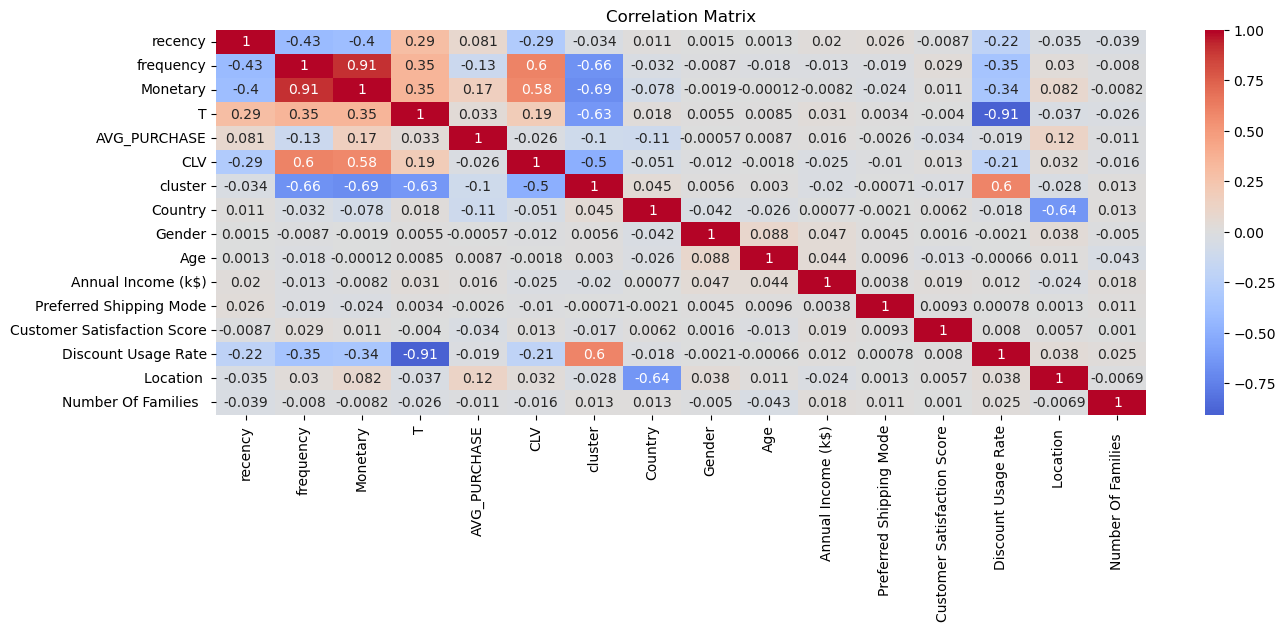

In [124]:
plt.figure(figsize=(15, 5))
sns.heatmap(corr1, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [125]:
features = merged_df.drop(columns=(['CustomerID'])).columns

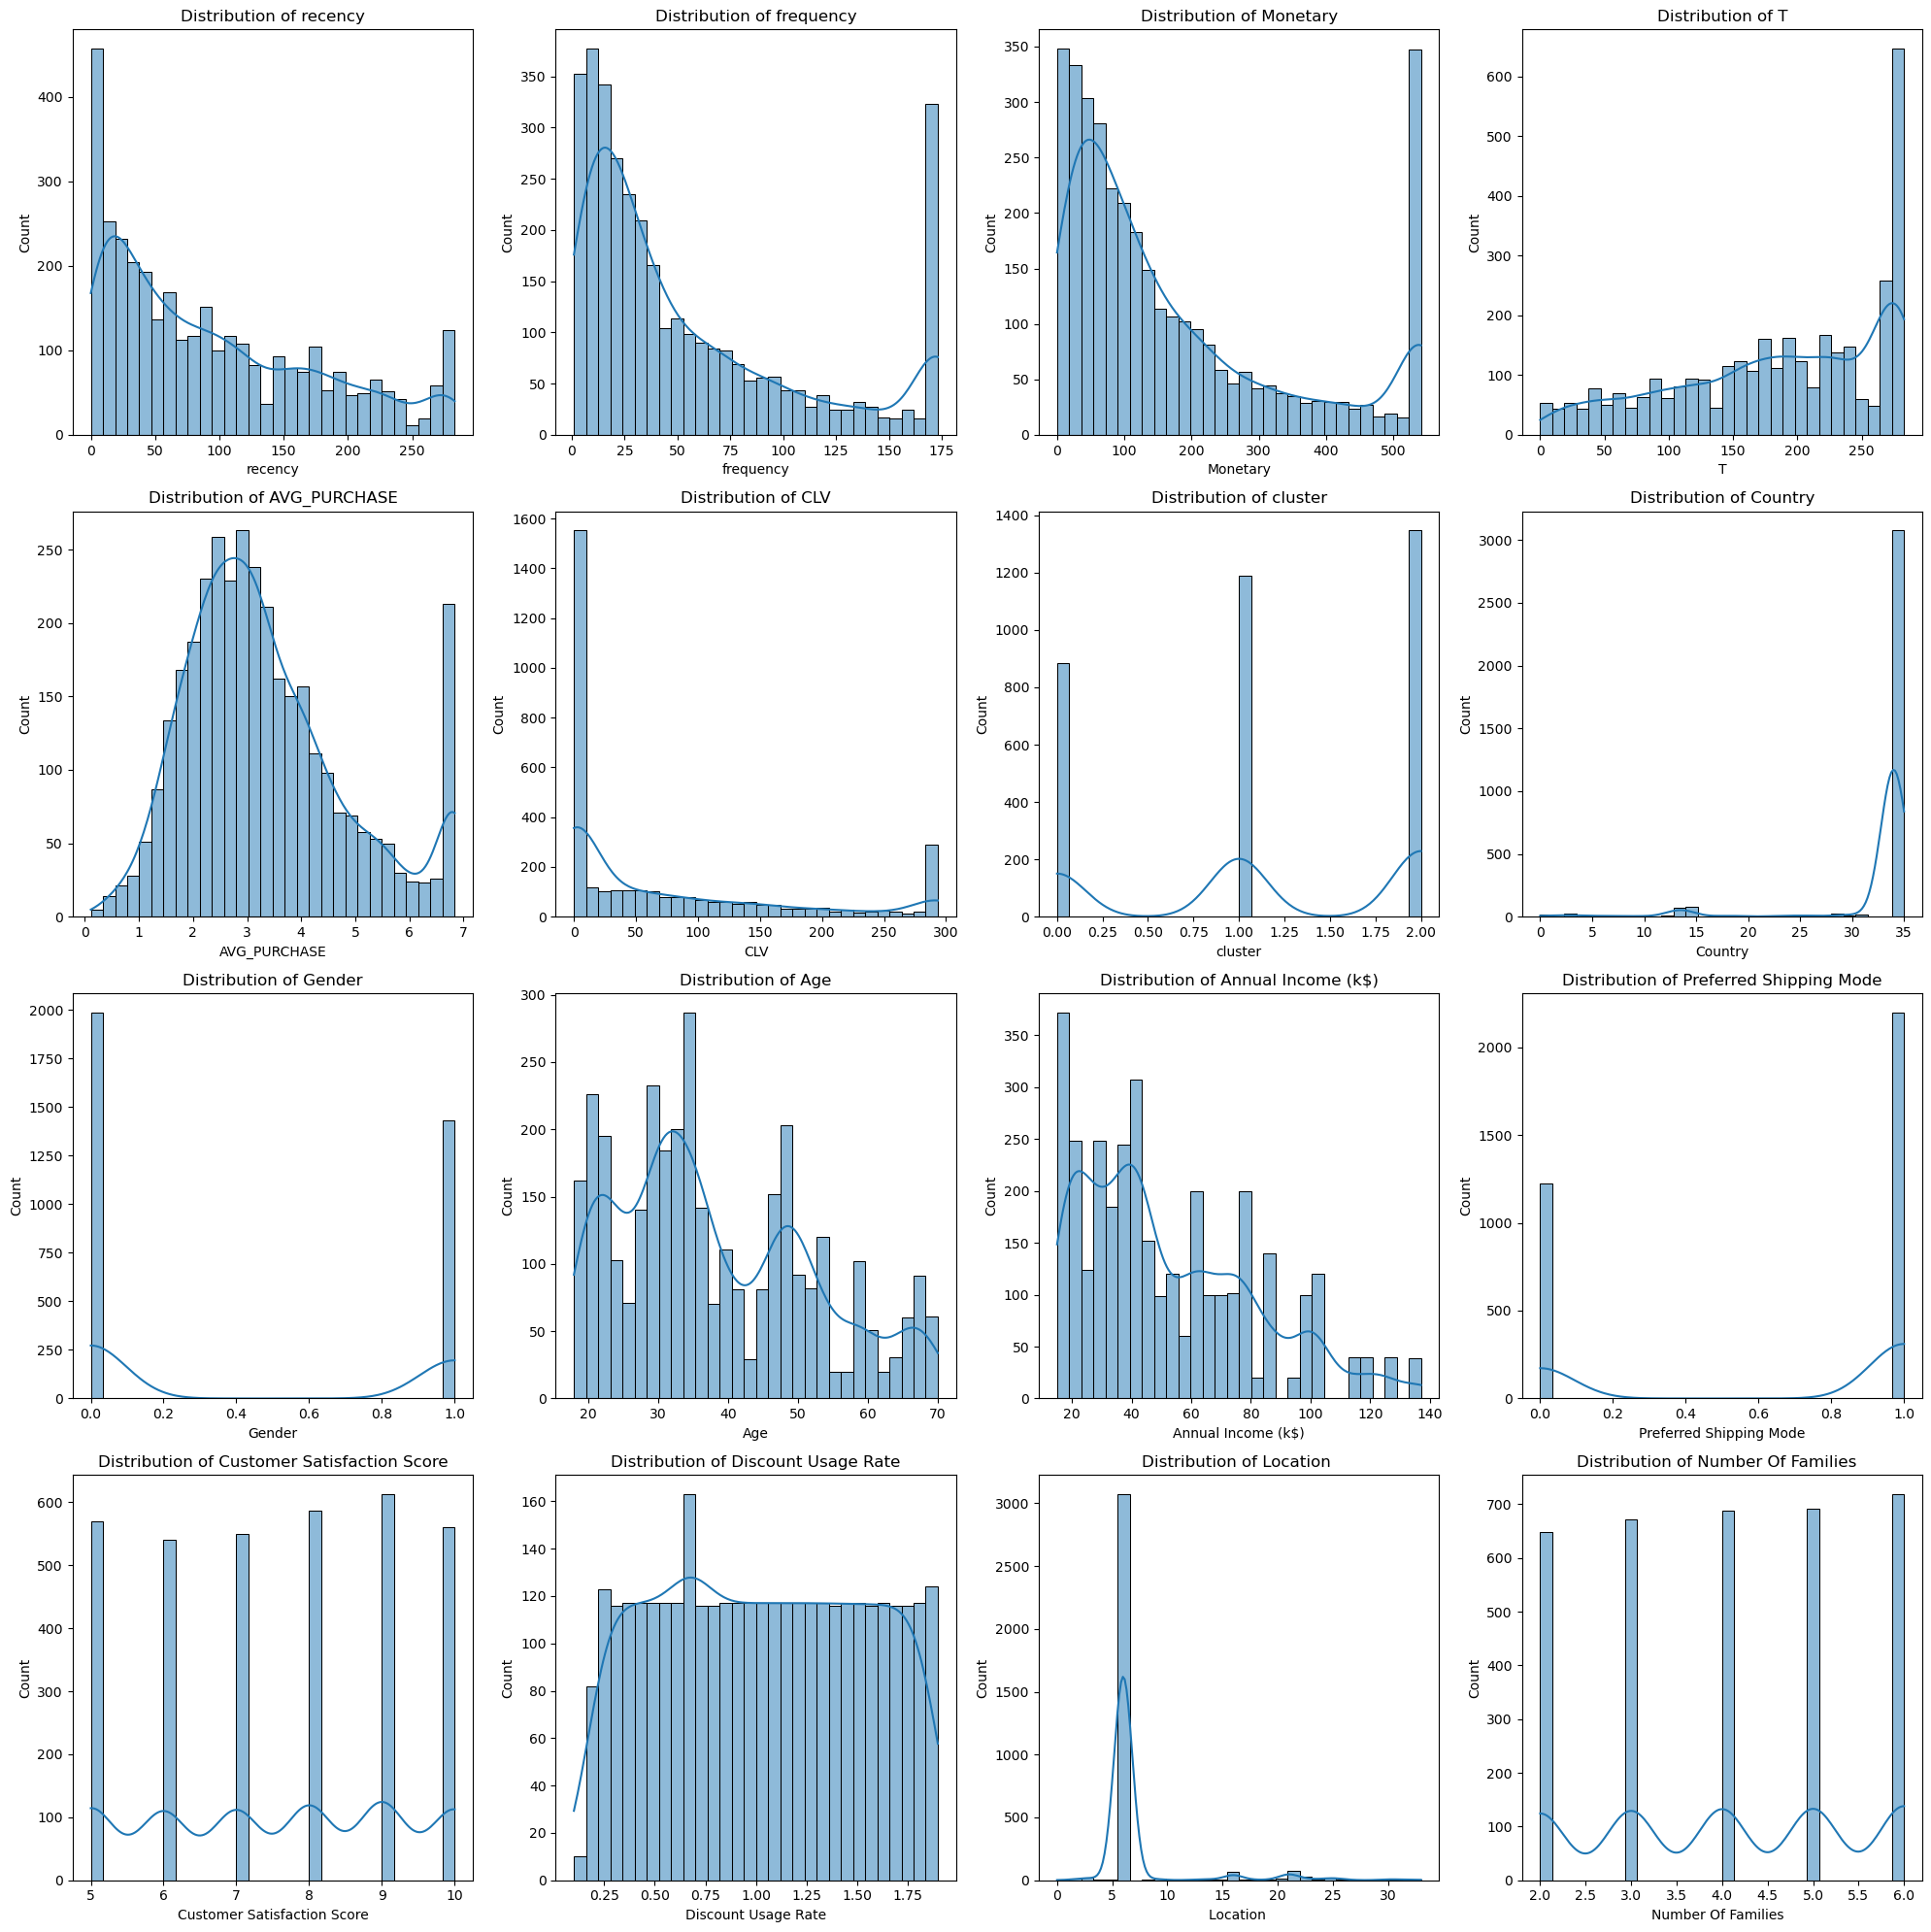

In [126]:
n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols  

plt.figure(figsize=(20, 5 * n_rows)) 

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(merged_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [127]:
corr=merged_df.drop(columns=["CustomerID"]).corr()

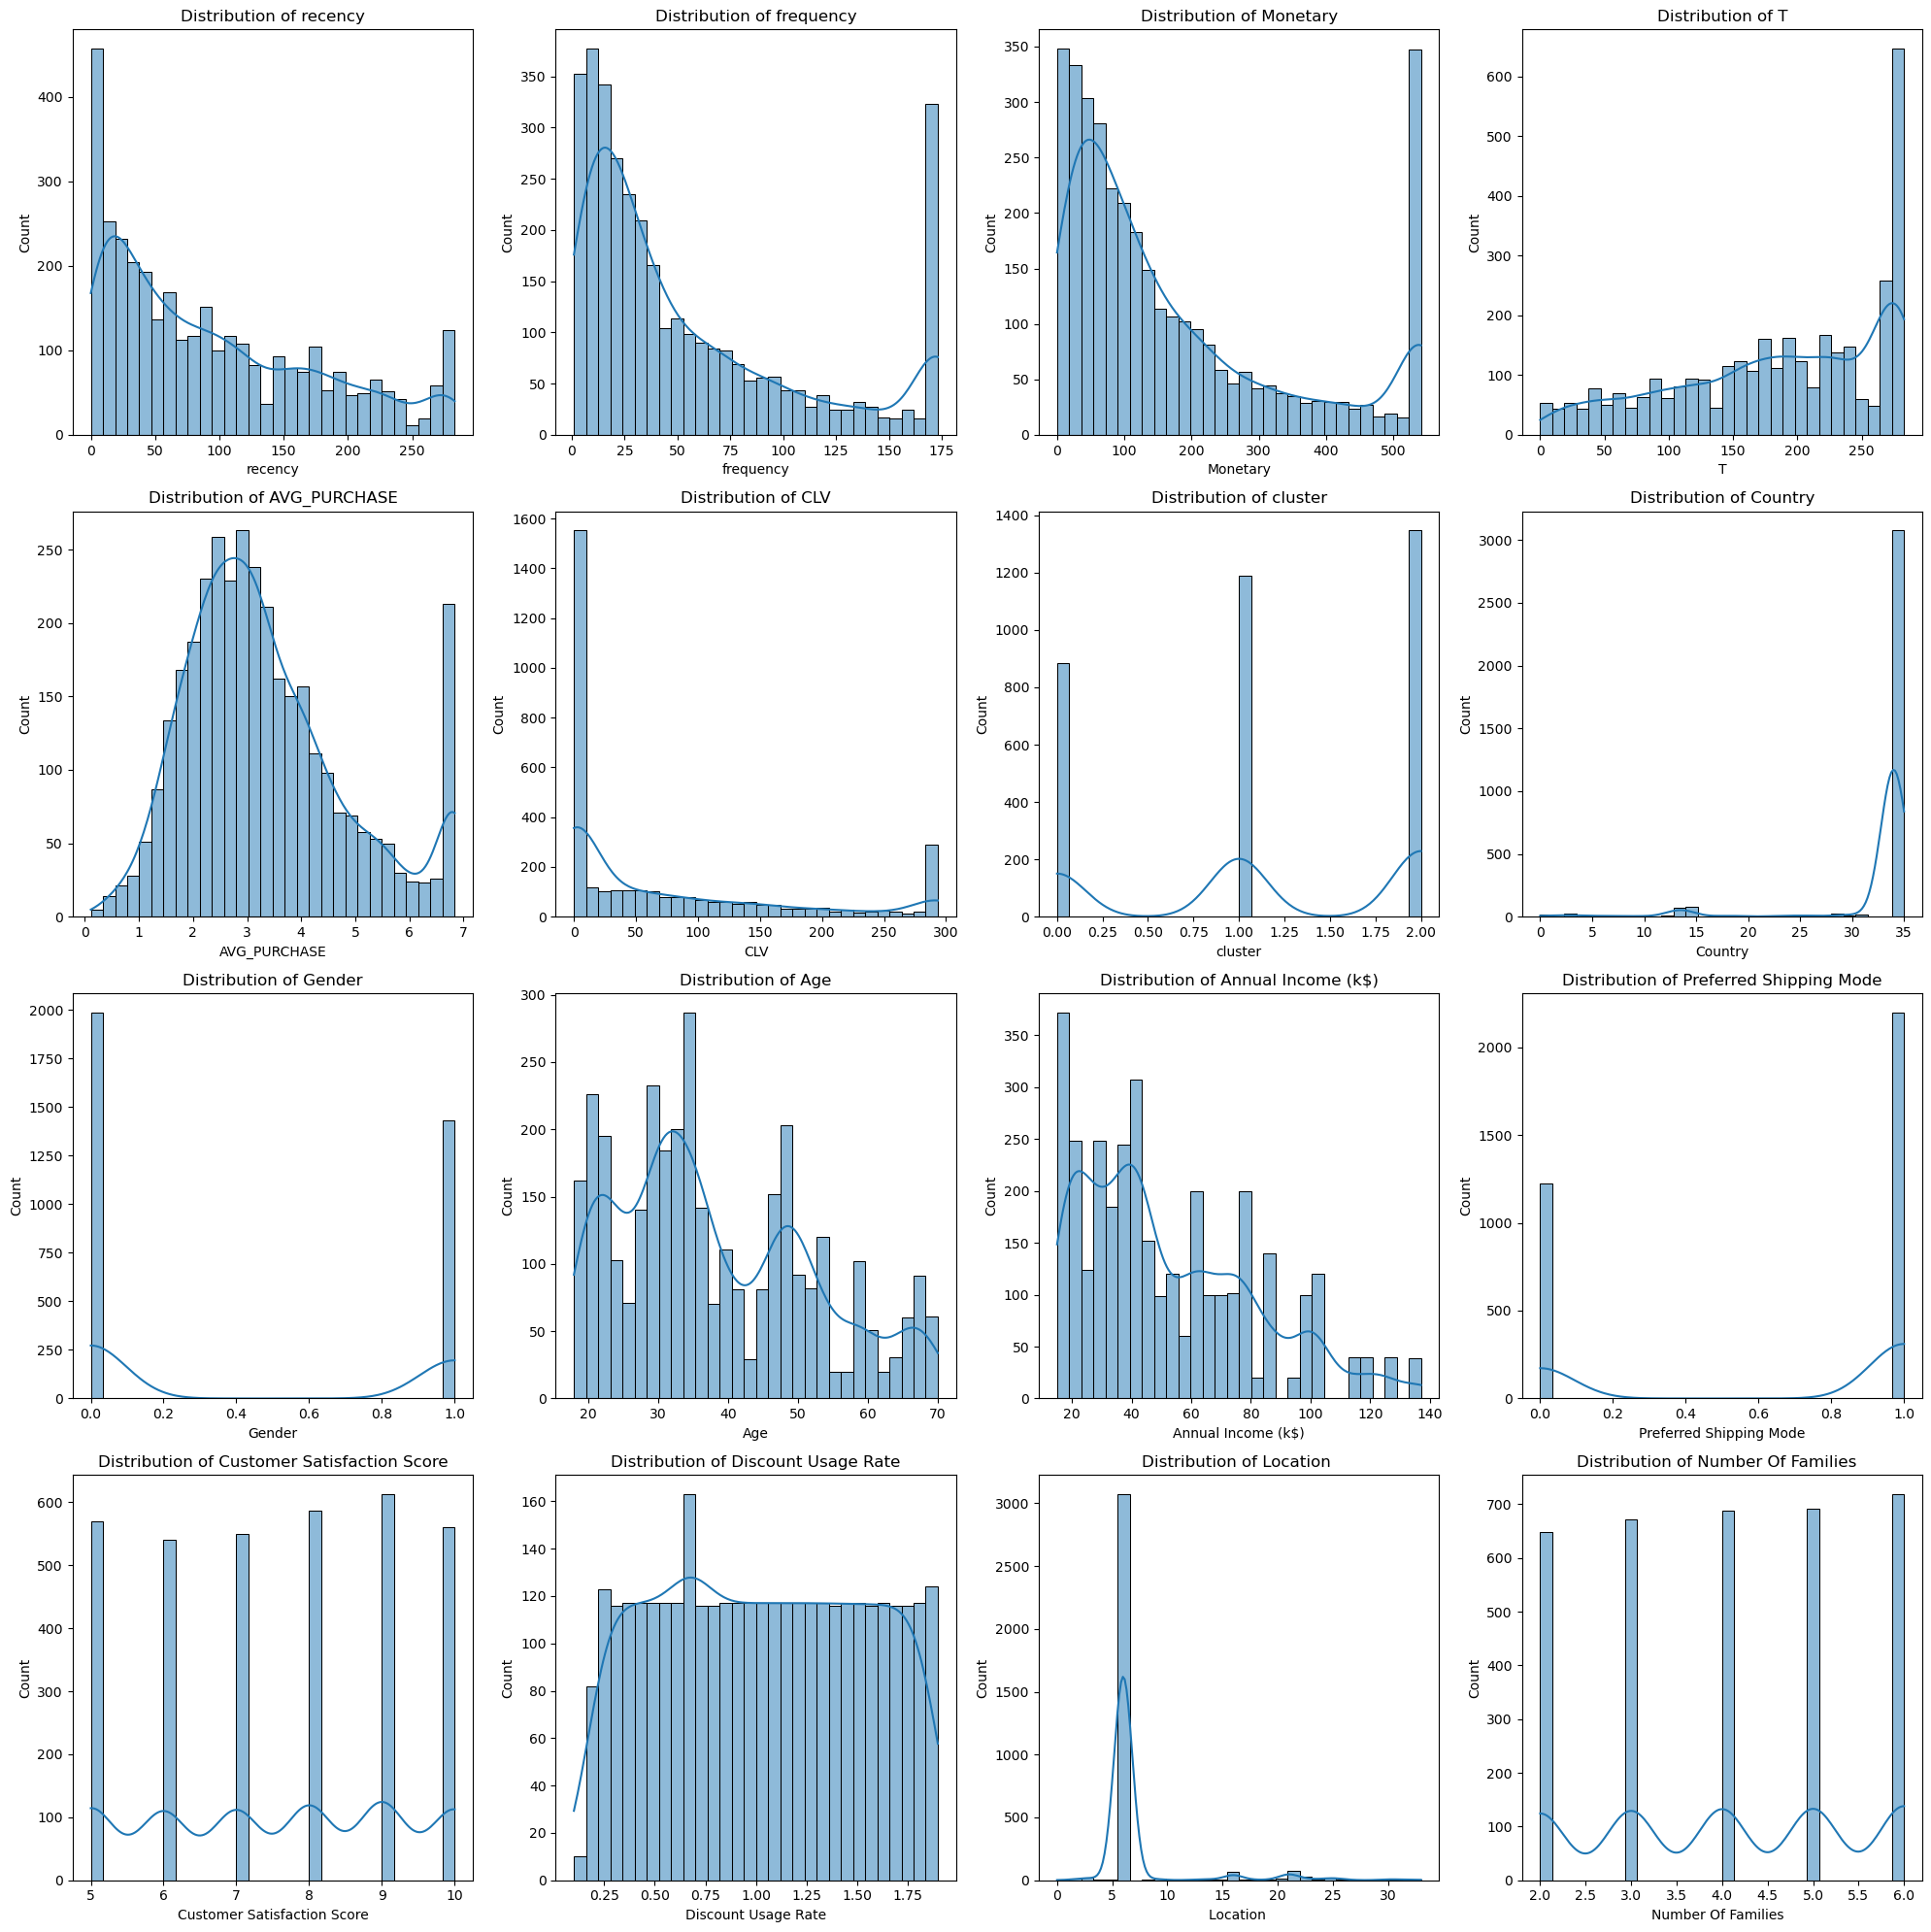

In [128]:
n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols  

plt.figure(figsize=(20, 5 * n_rows)) 

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(merged_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [129]:
y = merged_df['CLV']

In [130]:
x = merged_df.drop(columns=['CLV','CustomerID'])

In [131]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [132]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [133]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R-squared: {r2:.2f}")
    

print("Random Forest:")
evaluate_model(rf_model, X_test, y_test)


print("Linear Regression:")
evaluate_model(lr_model, X_test, y_test)


print("\nGradient Boosting:")
evaluate_model(gb_model, X_test, y_test)

Random Forest:
RMSE: 71.61, MAE: 52.67, R-squared: 0.39
Linear Regression:
RMSE: 72.74, MAE: 53.63, R-squared: 0.37

Gradient Boosting:
RMSE: 68.72, MAE: 50.67, R-squared: 0.44


In [134]:
y_gb = gb_model.predict(x)

In [135]:
y_lr = lr_model.predict(x)

In [136]:
y_rf =rf_model.predict(x)

In [137]:
merged_df['gb_predict'] = y_gb

In [138]:
merged_df['lr_predict'] = y_lr

In [139]:
merged_df['rf_predict'] = y_rf

In [140]:
merged_df.columns

Index(['CustomerID', 'recency', 'frequency', 'Monetary', 'T', 'AVG_PURCHASE',
       'CLV', 'cluster', 'Country', 'Gender', 'Age', 'Annual Income (k$)',
       'Preferred Shipping Mode', 'Customer Satisfaction Score',
       'Discount Usage Rate', 'Location ', 'Number Of Families  ',
       'gb_predict', 'lr_predict', 'rf_predict'],
      dtype='object')

In [141]:
visual =merged_df.drop(columns=['recency','frequency','Monetary','T','AVG_PURCHASE','Country','Gender','Age','Annual Income (k$)','Preferred Shipping Mode','Customer Satisfaction Score','Discount Usage Rate','Location ','Number Of Families  '])

In [142]:
visual

,CustomerID,CLV,cluster,gb_predict,lr_predict,rf_predict
0,12346.0,0.00000,1,-1.996684,19.241011,3.737100
1,12347.0,134.30000,0,119.246918,149.988029,136.574962
2,12348.0,42.50000,1,25.509614,51.064187,45.758950
3,12350.0,0.00000,1,27.646623,29.204634,24.202562
4,12352.0,293.35625,0,155.378266,114.581463,229.361525
...,...,...,...,...,...,...
3415,18280.0,0.00000,1,18.339955,33.975172,3.190800
3416,18281.0,0.00000,2,14.331081,11.310018,8.640400
3417,18282.0,23.52000,2,27.729527,39.184627,20.031800
3418,18283.0,293.35625,0,208.715080,205.189419,209.522813


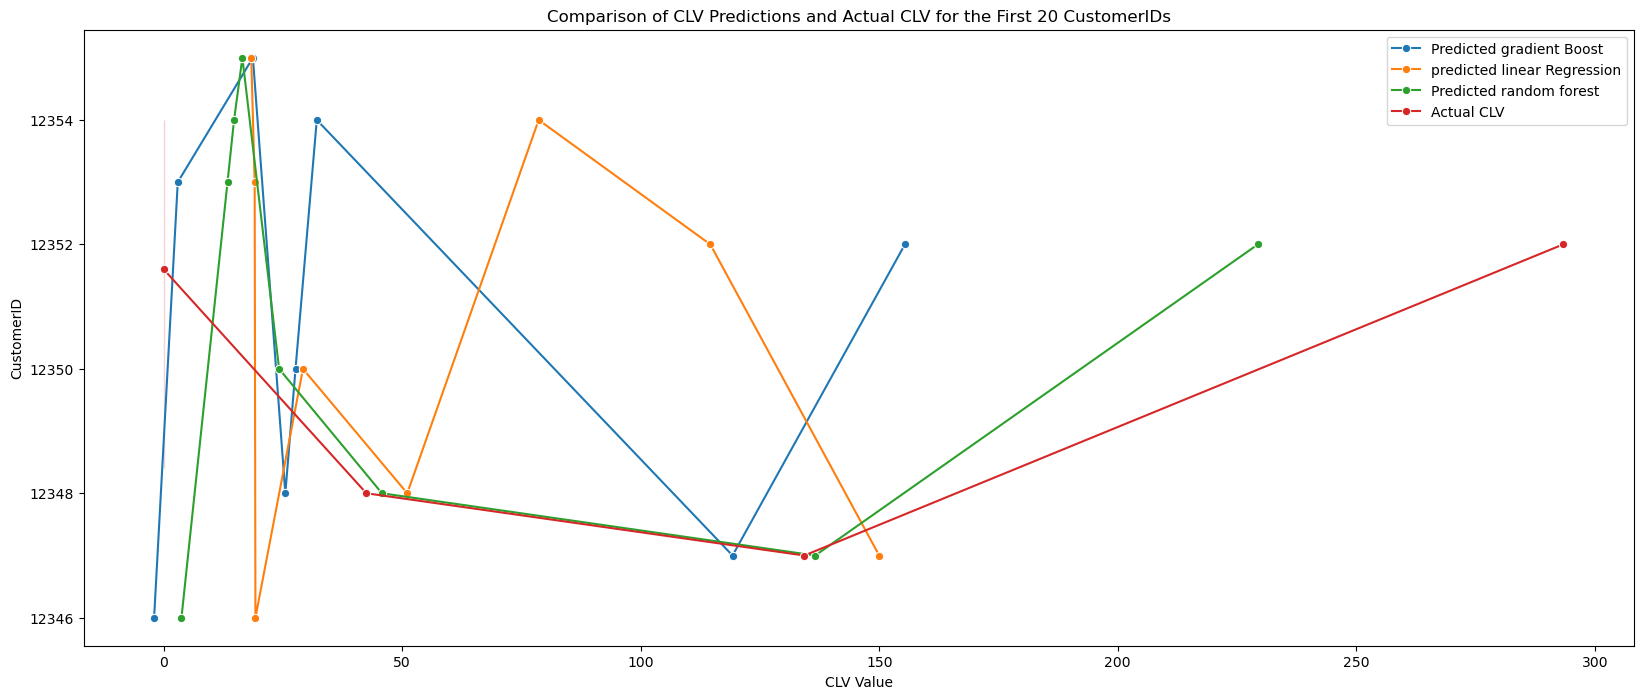

In [143]:
visualize = visual.head(8)

plt.figure(figsize=(20, 8))

sns.lineplot(data= visualize, x="gb_predict", y="CustomerID", label='Predicted gradient Boost', marker='o')

sns.lineplot(data=  visualize,x="lr_predict", y="CustomerID", label='predicted linear Regression', marker='o')

sns.lineplot(data= visualize, x="rf_predict", y="CustomerID", label='Predicted random forest', marker='o')

sns.lineplot(data= visualize, x="CLV", y="CustomerID", label='Actual CLV ', marker='o')

plt.title('Comparison of CLV Predictions and Actual CLV for the First 20 CustomerIDs')
plt.xlabel('CLV Value')
plt.ylabel('CustomerID')
plt.legend()

In [144]:
merged_df

,CustomerID,recency,frequency,Monetary,T,AVG_PURCHASE,CLV,cluster,Country,Gender,Age,Annual Income (k$),Preferred Shipping Mode,Customer Satisfaction Score,Discount Usage Rate,Location,Number Of Families,gb_predict,lr_predict,rf_predict
0,12346.0,235.0,2.000,2.08000,235.0,1.040000,0.00000,1,34,0,31,81,0,8,0.77,6,2,-1.996684,19.241011,3.737100
1,12347.0,39.0,124.000,346.91000,276.0,2.797661,134.30000,0,16,1,26,62,1,6,0.39,28,6,119.246918,149.988029,136.574962
2,12348.0,158.0,28.000,136.21000,267.0,4.864643,42.50000,1,12,1,21,15,0,9,0.62,8,3,25.509614,51.064187,45.758950
3,12350.0,219.0,17.000,65.30000,219.0,3.841176,0.00000,1,24,1,40,54,1,5,0.90,15,3,27.646623,29.204634,24.202562
4,12352.0,171.0,48.000,541.23125,206.0,6.837877,293.35625,0,24,1,53,33,0,8,0.98,15,5,155.378266,114.581463,229.361525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,18280.0,187.0,10.000,47.65000,187.0,4.765000,0.00000,1,34,0,30,78,1,9,1.11,6,3,18.339955,33.975172,3.190800
3416,18281.0,90.0,7.000,39.36000,90.0,5.622857,0.00000,2,34,1,19,81,1,8,1.64,6,6,14.331081,11.310018,8.640400
3417,18282.0,31.0,8.000,39.16000,35.0,4.895000,23.52000,2,34,0,35,18,1,5,1.83,6,2,27.729527,39.184627,20.031800
3418,18283.0,5.0,173.125,541.23125,246.0,1.685257,293.35625,0,34,0,20,37,0,5,0.68,6,3,208.715080,205.189419,209.522813
